In [48]:
import pandas as pd 
import pyodbc
import warnings
warnings.simplefilter('ignore')
import sqlite3

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
DB = {'servername': 'LAPTOP-3S422SS6\\SQLEXPRESS', 'database': 'DAD'}

conn_str = (
    'DRIVER={SQL Server};'
    'SERVER=' + DB['servername'] + ';'
    'DATABASE=' + DB['database'] + ';'
    'Trusted_Connection=yes;'
)

conn = pyodbc.connect(conn_str)

query = "SELECT * FROM ORDERR"
order = pd.read_sql_query(query, conn)

query = "SELECT * FROM RETURNED_ITEM"
returned = pd.read_sql_query(query, conn)

conn.close()

In [ ]:
order['DATE_Order_date'] = pd.to_datetime(order['DATE_Order_date'])
order['Year'] = order['DATE_Order_date'].dt.year
order['Month'] = order['DATE_Order_date'].dt.month
order['Day'] = order['DATE_Order_date'].dt.day
order = order.drop('DATE_Order_date', axis=1) 

returned['DATE_date'] = pd.to_datetime(returned['DATE_date'])
returned['returned_Year'] = returned['DATE_date'].dt.year
returned['returned_Month'] = returned['DATE_date'].dt.month
returned['returned_Day'] = returned['DATE_date'].dt.day
returned = returned.drop('DATE_date', axis=1) 

In [99]:
returned_order_merge = pd.merge(order,returned,left_on='ORDER_number_id',how='left',right_on='ORDER_detail_id')
returned_order_merge['RETURN_ITEM_REASON_description'] = returned_order_merge['RETURN_ITEM_REASON_description'].fillna('n.v.t')
returned_order_merge

,ORDER_number_id,ORDER_detail_id_x,ORDER_Quantity,ORDER_unit_Cost,ORDER_Unit_price,ORDER_Unit_sale_price,Totale_omzet,ORDER_gross_profit,ORDER_profit_margin,ORDER_profit_per_product,...,Month,Day,RETURNED_ITEM_id,RETURNED_ITEM_quantity,ORDER_detail_id_y,RETURN_ITEM_REASON_description,PRODUCT_NUMBER,returned_Year,returned_Month,returned_Day
0,47737,1638,84,4.38,6.59,6.59,553.56,185.64,33.54,2,...,8,16,NaN,NaN,NaN,n.v.t,NaN,NaN,NaN,NaN
1,47738,1159,126,4.38,6.59,6.59,830.34,278.46,33.54,2,...,4,5,NaN,NaN,NaN,n.v.t,NaN,NaN,NaN,NaN
2,47739,1171,122,4.38,6.59,6.03,735.66,201.30,27.36,1,...,4,16,NaN,NaN,NaN,n.v.t,NaN,NaN,NaN,NaN
3,47740,1154,122,4.38,6.59,6.59,803.98,269.62,33.54,2,...,10,1,NaN,NaN,NaN,n.v.t,NaN,NaN,NaN,NaN
4,47741,1205,272,4.38,6.59,5.26,1430.72,239.36,16.73,0,...,4,23,NaN,NaN,NaN,n.v.t,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43058,115289,7631,70,6.00,9.00,9.00,630.00,210.00,33.33,3,...,1,9,NaN,NaN,NaN,n.v.t,NaN,NaN,NaN,NaN
43059,115290,7627,44,6.00,12.00,9.00,396.00,132.00,33.33,3,...,9,9,NaN,NaN,NaN,n.v.t,NaN,NaN,NaN,NaN
43060,115291,7630,8,80.00,200.00,140.00,1120.00,480.00,42.86,60,...,3,13,NaN,NaN,NaN,n.v.t,NaN,NaN,NaN,NaN
43061,115292,7631,24,5.00,10.00,10.00,240.00,120.00,50.00,5,...,1,9,NaN,NaN,NaN,n.v.t,NaN,NaN,NaN,NaN


In [100]:
returned_order_merge = returned_order_merge[['ORDER_unit_Cost', 'ORDER_Unit_price', 'ORDER_Unit_sale_price', 'PRODUCT_number', 'RETAILER_SITE_id', 'SALES_STAFF_id', 'Year','Month','RETURNED_ITEM_quantity','RETURN_ITEM_REASON_description','returned_Year','returned_Month','returned_Day']]
returned_order_encoded= pd.get_dummies(returned_order_merge, columns=['PRODUCT_number', 'RETAILER_SITE_id', 'SALES_STAFF_id'], drop_first=True)
returned_order_encoded 

,ORDER_unit_Cost,ORDER_Unit_price,ORDER_Unit_sale_price,Year,Month,RETURNED_ITEM_quantity,RETURN_ITEM_REASON_description,returned_Year,returned_Month,returned_Day,...,SALES_STAFF_id_114,SALES_STAFF_id_115,SALES_STAFF_id_116,SALES_STAFF_id_117,SALES_STAFF_id_118,SALES_STAFF_id_120,SALES_STAFF_id_121,SALES_STAFF_id_122,SALES_STAFF_id_123,SALES_STAFF_id_124
0,4.38,6.59,6.59,2020,8,NaN,n.v.t,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
1,4.38,6.59,6.59,2020,4,NaN,n.v.t,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
2,4.38,6.59,6.03,2020,4,NaN,n.v.t,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
3,4.38,6.59,6.59,2020,10,NaN,n.v.t,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
4,4.38,6.59,5.26,2020,4,NaN,n.v.t,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43058,6.00,9.00,9.00,2022,1,NaN,n.v.t,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
43059,6.00,12.00,9.00,2022,9,NaN,n.v.t,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
43060,80.00,200.00,140.00,2022,3,NaN,n.v.t,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
43061,5.00,10.00,10.00,2022,1,NaN,n.v.t,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False


### Horizontaal en vertical snijden ###

In [101]:
X = returned_order_encoded .drop('RETURN_ITEM_REASON_description', axis=1)  
y = returned_order_encoded [['RETURN_ITEM_REASON_description']]
y_encoded = pd.get_dummies(y, drop_first=True)


In [102]:
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(
    X, y_encoded, test_size=0.15, random_state=42
)

### Decision Tree bouwen en evalueren ###

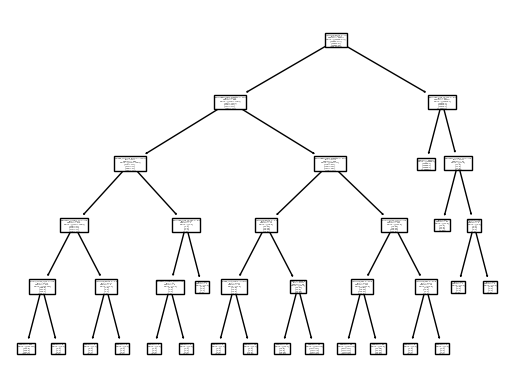

In [118]:
dtree = DecisionTreeClassifier(max_depth=5)
dtree.fit(X_train, y_train_encoded)
tree.plot_tree(dtree,feature_names = X.columns)
plt.show()

In [119]:
predicted_df = pd.DataFrame(dtree.predict(X_test))
predicted_df = predicted_df.rename(columns={0: 'Predicted_Return_Reason'})
y_test_encoded = y_test_encoded.reset_index(drop=True)
model_results_frame = pd.concat([y_test_encoded, predicted_df], axis=1)

### Confusion matrix ###

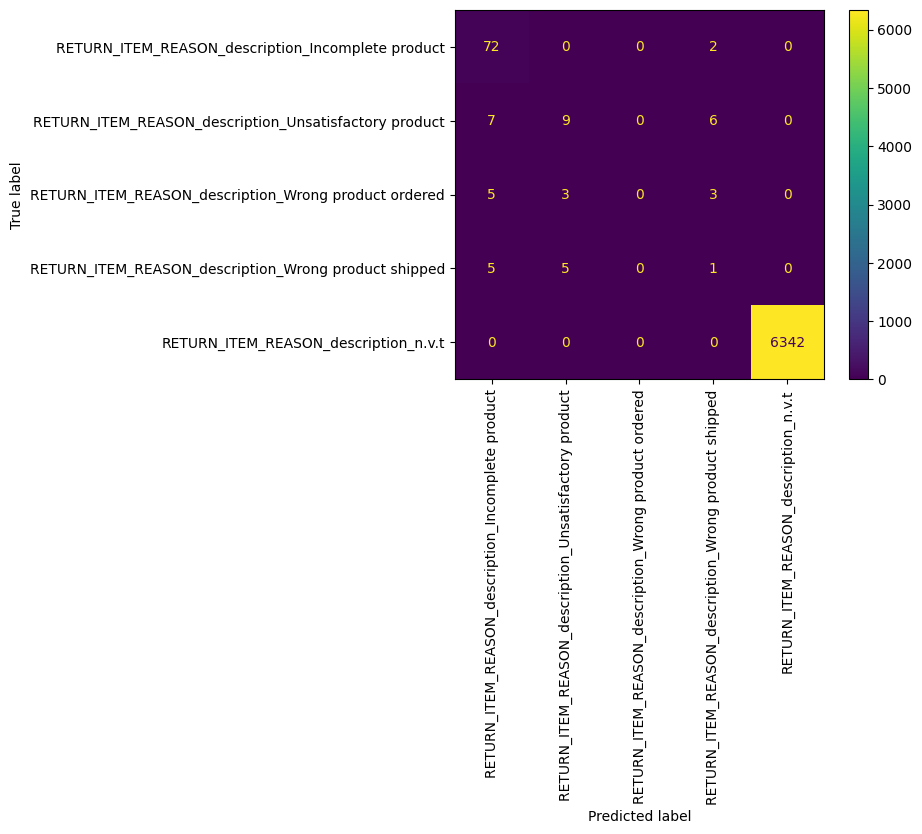

In [120]:
predicted_df.columns = y_test_encoded.columns
predicted_labels = predicted_df.idxmax(axis=1)
actual_labels = y_test_encoded.idxmax(axis=1)
confusion_mat = metrics.confusion_matrix(actual_labels, predicted_labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=y_test_encoded.columns)
cm_display.plot()
plt.xticks(rotation='vertical')
plt.show()

### Accuracy score berekenen ###

In [121]:
actual_labels = y_test_encoded.idxmax(axis=1)
predicted_labels = predicted_df.idxmax(axis=1)
accuracy = metrics.accuracy_score(actual_labels, predicted_labels)
print("Accuracy:", accuracy)

Accuracy: 0.9944272445820433
